# TIME BASED ANALYSIS

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the Uber dataset
df=pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
# Convert START_DATE to datetime, handling errors
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['START_DATE'])
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies
1044,2016-12-12 13:36:00,12-12-2016 13:51,Business,Cary,Apex,4.4,Meal/Entertain
1045,2016-12-12 14:26:00,12-12-2016 14:39,Business,Apex,Cary,4.7,Customer Visit
1046,2016-12-12 17:51:00,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain


In [7]:
# Extract date components
df['Year'] = df['START_DATE'].dt.year
df['Month'] = df['START_DATE'].dt.month_name()
df['Day'] = df['START_DATE'].dt.day
df['Hour'] = df['START_DATE'].dt.hour
df['Day_of_Week'] = df['START_DATE'].dt.day_name()

In [9]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Year,Month,Day,Hour,Day_of_Week
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,1,21,Friday
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January,2,1,Saturday
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,2,20,Saturday
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,5,17,Tuesday
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,6,14,Wednesday


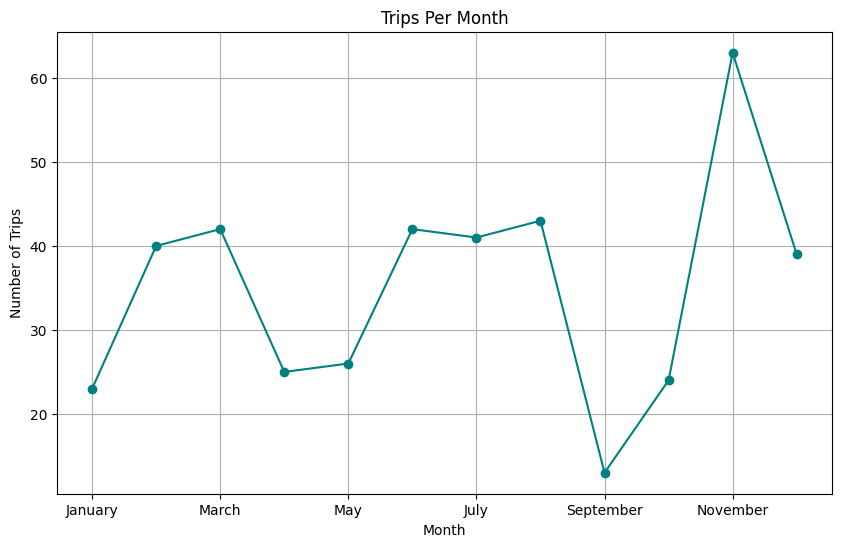

In [12]:
# Visualize Trips by Months
monthly_trips = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_trips.plot(kind='line', marker='o', color='teal', figsize=(10, 6))
plt.title("Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.grid()
plt.show()

C:\Users\Suraj Patil\AppData\Local\Temp\ipykernel_3668\4210741362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, order=[


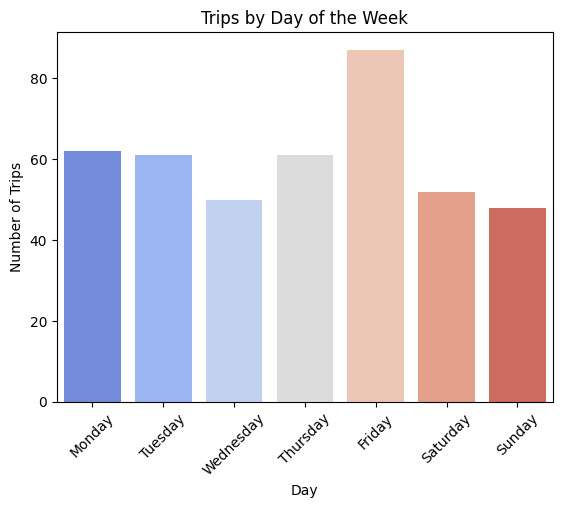

In [19]:
# Analyze the Trips By Day of the Week (Bar Plot)
df['Day_of_Week'] = df['START_DATE'].dt.day_name()
sns.countplot(x='Day_of_Week', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title("Trips by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()
# Insight: Most trips are made on weekdays, with a dip during weekends.

In [23]:
# Extract date
df['Date'] = df['START_DATE'].dt.date

# Group by date to calculate daily trips
daily_trips = df.groupby('Date').size()
daily_trips

Date
2016-01-01    1
2016-01-02    2
2016-01-05    1
2016-01-06    3
2016-01-07    1
             ..
2016-12-08    4
2016-12-09    4
2016-12-10    4
2016-12-11    3
2016-12-12    5
Length: 114, dtype: int64

<Figure size 2000x3000 with 0 Axes>

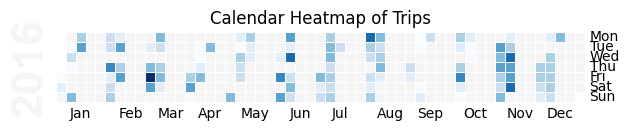

In [31]:
# Calendar Heatmap for Trips per day
import calmap
df['Date'] = pd.to_datetime(df['START_DATE'].dt.date)
daily_trips = df.groupby('Date').size()
plt.figure(figsize=(20, 30))
calmap.calendarplot(daily_trips, fillcolor='whitesmoke', cmap='Blues', linewidth=0.5)
plt.title("Calendar Heatmap of Trips")
plt.show()

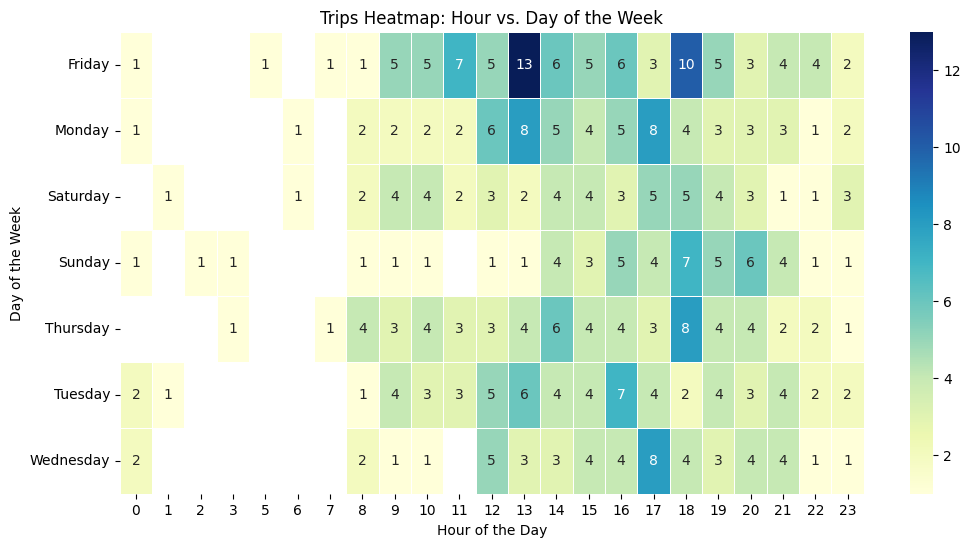

In [34]:
# Heatmap of Trips by Hour and Day of the Week 
hourly_weekly = df.groupby(['Day_of_Week', 'Hour']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_weekly, cmap='YlGnBu', linewidths=0.5, annot=True)
plt.title("Trips Heatmap: Hour vs. Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

C:\Users\Suraj Patil\AppData\Local\Temp\ipykernel_3668\510053064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hour', y='MILES', data=df, palette='viridis')


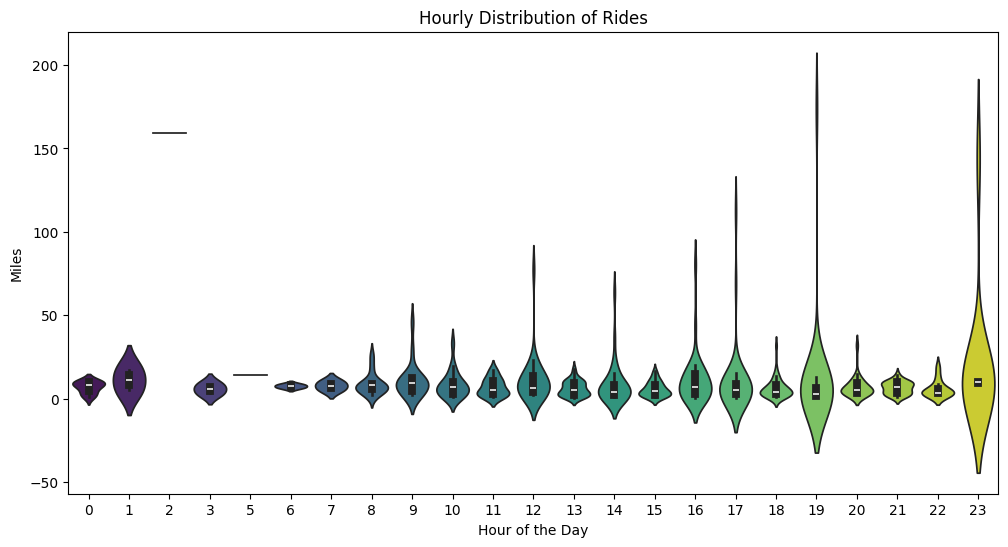

In [37]:
#Hourly Distribution of Rides (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Hour', y='MILES', data=df, palette='viridis')
plt.title("Hourly Distribution of Rides")
plt.xlabel("Hour of the Day")
plt.ylabel("Miles")
plt.show()

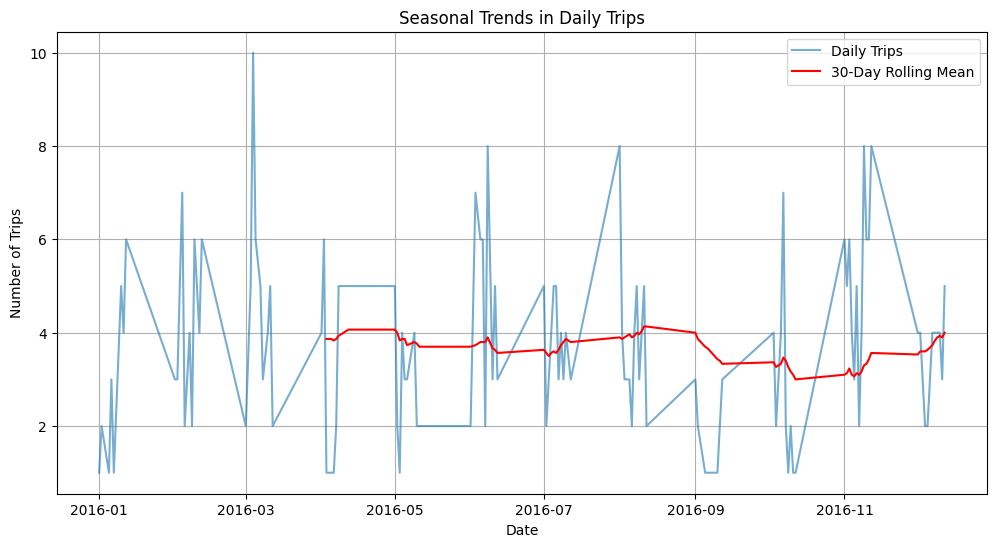

In [38]:
# Seasonal Trends with Rolling Mean
df['Date'] = df['START_DATE'].dt.date
daily_trips = df.groupby('Date').size()
rolling_mean = daily_trips.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_trips, label="Daily Trips", alpha=0.6)
plt.plot(rolling_mean, label="30-Day Rolling Mean", color='red')
plt.title("Seasonal Trends in Daily Trips")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid()
plt.show()

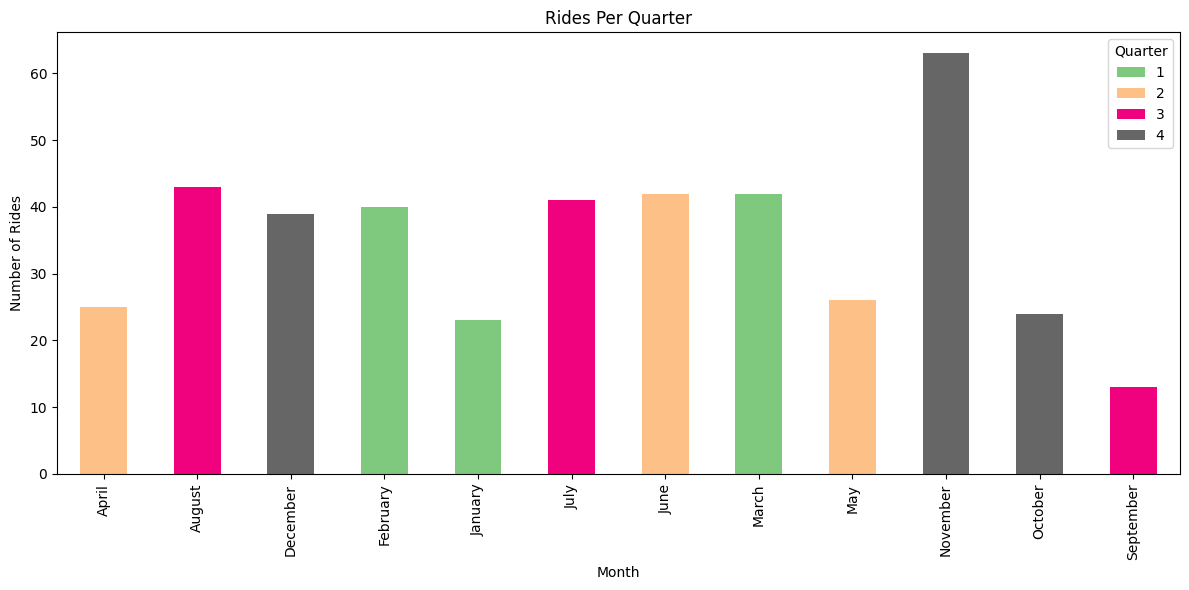

In [39]:
#Grouped Bar Chart for Quarterly Rides
df['Quarter'] = df['START_DATE'].dt.quarter
quarterly_trips = df.groupby(['Quarter', 'Month']).size().unstack().fillna(0)

quarterly_trips.T.plot(kind='bar', stacked=True, colormap='Accent', figsize=(12, 6))
plt.title("Rides Per Quarter")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.legend(title="Quarter", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

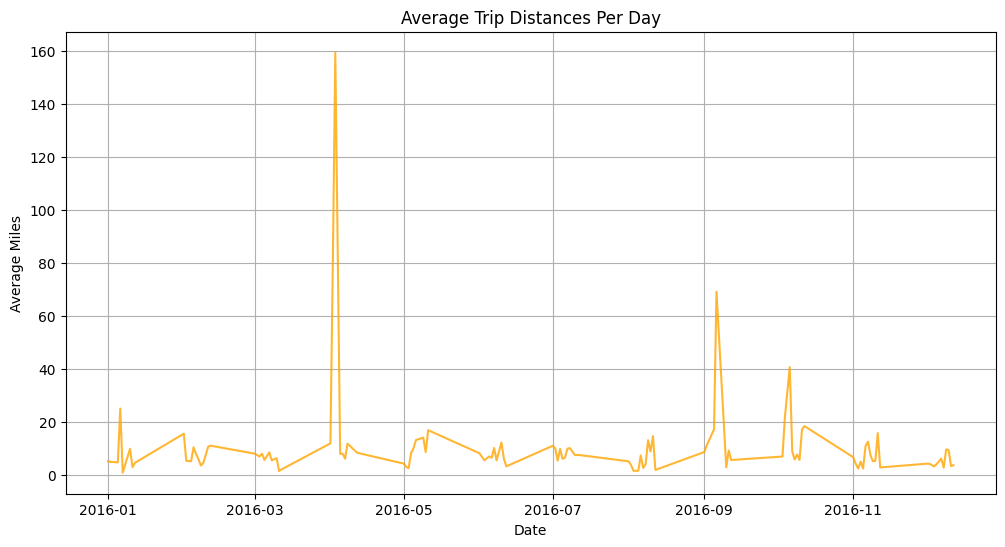

In [40]:
# Time Series : Average Trip Distances Per Day
daily_miles = df.groupby('Date')['MILES'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles, color='orange', alpha=0.8)
plt.title("Average Trip Distances Per Day")
plt.xlabel("Date")
plt.ylabel("Average Miles")
plt.grid()
plt.show()